<a href="https://colab.research.google.com/github/Dharmi1906/DataScience-clg-practicals/blob/master/Practical_2_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
#importing data
tmdb_data = pd.read_csv("tmdb_movies_data.csv")

#getting overview of various columns
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [36]:
#finding dimensions
print(tmdb_data.shape)

(10866, 21)


# ***Dealing with NA values***

In [37]:
#Let's see how many columns contains NA values
tmdb_data.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

1. So, we can see imdb_id, cast, homepage, director,tagline, overview, genres and production_companies contains NA values
2. Let's visualize to make it more clear

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


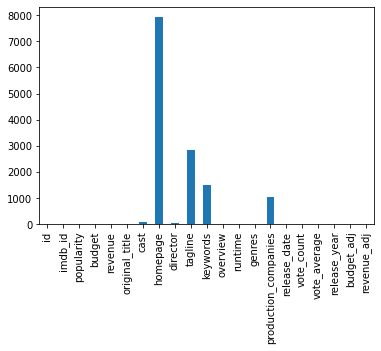

In [38]:
#Getting count of NA values in each column
print(tmdb_data.isna().sum())

#visualizing
tmdb_data.isna().sum().plot(kind="bar")


We can say that Homepage column has literally double the NA values than Tagline.

Let's drop rows with NA values.



In [39]:
tmdb_data_cleaned = tmdb_data.dropna()
tmdb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [40]:
#finding summary statistics 
tmdb_data_cleaned.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

Checking for and dropping of duplicates

Only keep columns that are needed for analysis

Create variable "profit"

Split genres



In [41]:
# Drop duplicates
tmdb_data.drop_duplicates(inplace=True)
# Check if done (-1 entry)
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

Almost all variables I need for my analysis have no null entries. Only for genres there are 23 null entries. In the next step I will first drop the null entries for genres and then only keep columns that I need for my further analysis. Plus, I will create a column showing the profit of each movie.

In [43]:
# Drop rows containing missing values in genres
tmdb_data.dropna(subset=['genres'], inplace=True)  
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date       

In [44]:
# Create variable profit
tmdb_data ['profit'] = tmdb_data['revenue'] - tmdb_data['budget']

In [45]:
# Only keep columns that are needed for further analysis using movie title as index
md = tmdb_data[['popularity','budget','revenue', 'original_title','runtime', 'genres','vote_count','vote_average','profit','release_year']]
# md.set_index('original_title', inplace=True)

In [46]:
# Check result
md.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,profit,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1363528810,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,228436354,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,185238201,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1868178225,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,1316249360,2015


In [47]:
# Split genres and create a new entry for each of the genre a movie falls into
s = md['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del md['genres']
md_split_genres = md.join(s)

In [48]:
# Check result
md_split_genres.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,profit,release_year,genres
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,1363528810,2015,Action
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,1363528810,2015,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,1363528810,2015,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,1363528810,2015,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,228436354,2015,Action


In [49]:
# Check entries (should be a lot more rows since the most movies have more than one genre)
md_split_genres.shape

(26955, 10)

Now the data is ready for exploratory analysis.

##Exploratory Data Analysis
###Explore Data
###### Distribution of variables
###### Descriptive statistics
###### Research Questions: Genre analysis (Q1 - Q7)
###### Research Hypotheses: Correlation analysis (H1 - H5)

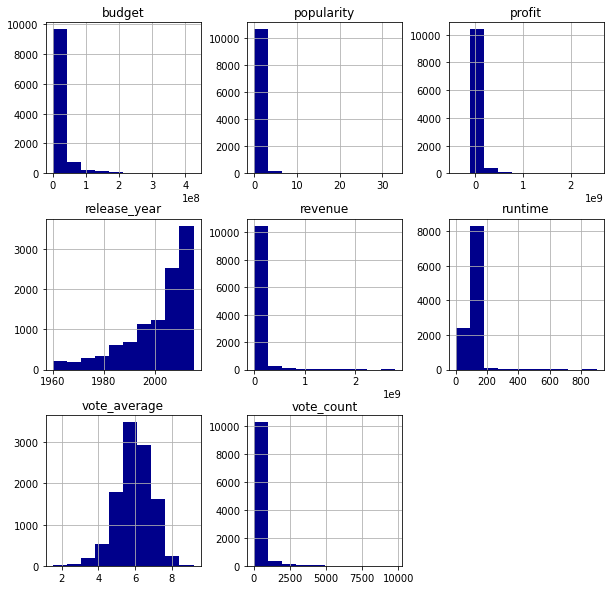

In [50]:
#Look at histograms to get idea of how variables are distrubuted (overall)
md.hist(color='DarkBlue',figsize= (10,10));

All variables are skewed. The only variable that is closed to a normal distribution is vote avg. (slightly right skewed).

In [51]:
# Group data by genre and get mean for each genre and each variable, divide by 1 mio for clarity and better visibility
md_genre_mean = md_split_genres.groupby(['genres']).mean()
md_genre_mean ['profit_million'] = md_genre_mean['profit']/1000000
del md_genre_mean['profit']
md_genre_mean['revenue_million'] = md_genre_mean['revenue']/1000000
del md_genre_mean['revenue']
md_genre_mean['budget_million'] =md_genre_mean['budget']/1000000
del md_genre_mean['budget']

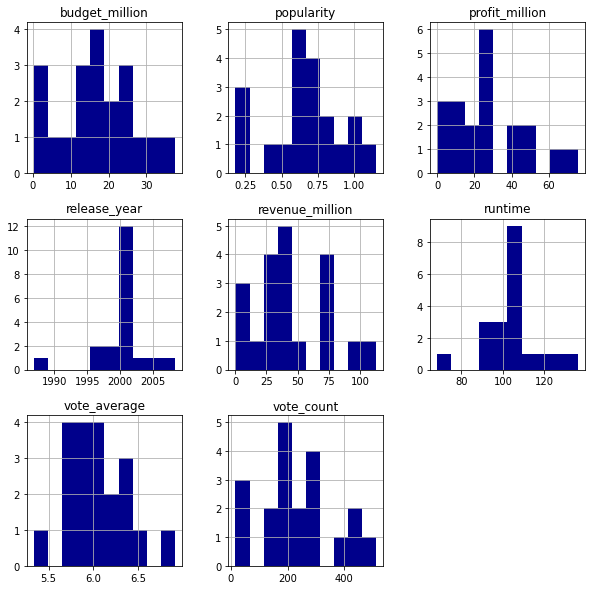

In [52]:
# Get distribution of mean of variables grouped by genre
md_genre_mean.hist(color='DarkBlue',figsize= (10,10));

All means of variables per genre are skewed. Mean of runtime across genres is closest to being normally distributed.

In [54]:
# Overall Descriptive statistics
md.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit,release_year
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,10842.000000
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2.525607e+07,2001.314794
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,9.668645e+07,12.813617
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,-4.139124e+08,1960.000000
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,1995.000000
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,2006.000000
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,9.176386e+06,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2.544506e+09,2015.000000


In [55]:
# Get movies with highest budget, profit, popularity
md.nlargest(3, 'budget')

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,profit,release_year
2244,0.250540,425000000,11087569,The Warrior's Way,100,74,6.4,-413912431,2010
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,136,3180,6.3,641683000,2011
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,169,2626,6.8,661000000,2007


In [56]:
md.nlargest(3, 'profit')

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,profit,release_year
1386,9.432768,237000000,2781505847,Avatar,162,8458,7.1,2544505847,2009
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,1868178225,2015
5231,4.355219,200000000,1845034188,Titanic,194,4654,7.3,1645034188,1997


In [57]:
md.nlargest(3, 'popularity')

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,profit,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,1363528810,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,228436354,2015
629,24.949134,165000000,621752480,Interstellar,169,6498,8.0,456752480,2014


The Warrior's Way had the highest budget with 425 mio USD. Avatar made the most profit with 2,544 mio USD. The most popular movie was Jurassic World.



In [58]:
# Get movies made per year, create new data frame
md_year = pd.DataFrame(md_split_genres.groupby('release_year').original_title.nunique())
md_year.head()

,original_title
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
